In [15]:
class EpsilonGreedyAgent:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] += (reward - self.values[arm]) / n


In [16]:
class UCBAgent:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_count = 0

    def select_arm(self):
        self.total_count += 1
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i  # explore untried arms
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_count) / self.counts)
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] += (reward - self.values[arm]) / n


In [17]:
class ThompsonSamplingAgent:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.alpha = np.zeros(n_arms)  # total reward
        self.beta = np.ones(n_arms)    # total pulls

    def select_arm(self):
        samples = np.random.normal(self.alpha / self.beta, 1 / np.sqrt(self.beta))
        return np.argmax(samples)

    def update(self, arm, reward):
        self.alpha[arm] += reward
        self.beta[arm] += 1


In [18]:
def run_agents_on_bandit(bandit, agents, T):
    n_agents = len(agents)
    rewards = np.zeros((n_agents, T))
    optimal_mean = np.max(bandit.means)

    for t in range(T):
        for j, agent in enumerate(agents):
            arm = agent.select_arm()
            reward = bandit.pull_arm(arm)
            agent.update(arm, reward)
            rewards[j, t] = reward

    cumulative_rewards = np.cumsum(rewards, axis=1)
    regret = (np.arange(1, T + 1) * optimal_mean) - cumulative_rewards
    return regret


In [21]:
def plot_regret_comparison(regret, labels):
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        plt.plot(regret[i], label=label)
    plt.title('Cumulative Regret Comparison')
    plt.xlabel('Time Steps')
    plt.ylabel('Regret')
    plt.legend()
    # plt.grid(True)
    plt.tight_layout()
    plt.show()


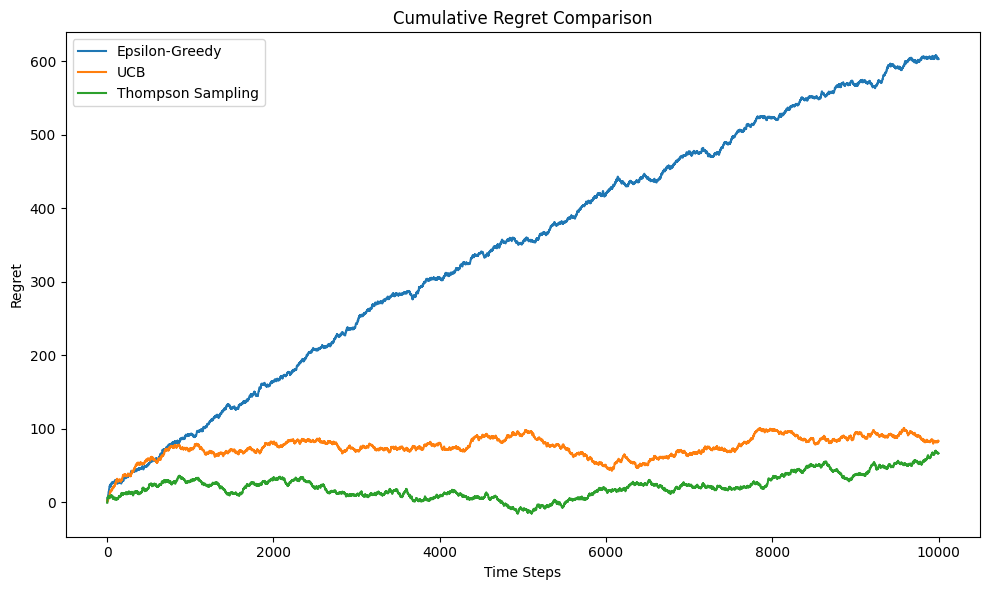

In [22]:
# Setup
T = 10000
true_means = [1.0, 1.5, 1.2, 0.8, 1.8]
bandit = GaussianBandit(true_means, std_dev=0.5)

# Create one of each agent
agents = [
    EpsilonGreedyAgent(n_arms=5, epsilon=0.1),
    UCBAgent(n_arms=5),
    ThompsonSamplingAgent(n_arms=5)
]
labels = ['Epsilon-Greedy', 'UCB', 'Thompson Sampling']

# Run and plot
regret = run_agents_on_bandit(bandit, agents, T)
plot_regret_comparison(regret, labels)
